In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Loading

In [2]:
%%time
aisles = pd.read_csv("data/aisles.csv")
departments = pd.read_csv("data/departments.csv")
order_products_prior = pd.read_csv("data/order_products__prior.csv")
order_products_train = pd.read_csv("data/order_products__train.csv")
orders = pd.read_csv("data/orders.csv")
products = pd.read_csv("data/products.csv")

Wall time: 1min 32s


In [3]:
print "Products has shape: ", products.shape
print "Order_products_prior has shape: ", order_products_prior.shape
print "Order_products_train has shape: ", order_products_train.shape
print "Orders: ", orders.shape

Products has shape:  (49688, 4)
Order_products_prior has shape:  (32434489, 4)
Order_products_train has shape:  (1384617, 4)
Orders:  (3421083, 7)


### Questions and Answers

- How many orders are there? 
- How many users are there? 
- What's the average number of orders for each user?

In [4]:
print "There are",orders.shape[0],"orders in total"
print "There are",orders.eval_set.value_counts()[0],"prior orders"
print "There are",orders.eval_set.value_counts()[1],"train orders"
print "There are",orders.eval_set.value_counts()[2],"test orders"
print "There are",orders.user_id.nunique(),"users"

average_order = round(orders.shape[0] * 1.0 / orders.user_id.nunique(),1)
print "There are",average_order,"orders in average for each user"
print "Each user has multiple prior orders, and has a train order or test order"

There are 3421083 orders in total
There are 3214874 prior orders
There are 131209 train orders
There are 75000 test orders
There are 206209 users
There are 16.6 orders in average for each user
Each user has multiple prior orders, and has a train order or test order


- What's the average number of items in an order?

In [5]:
print "There are",order_products_prior.order_id.nunique(),"orders in order_products_prior"
print "There are",round(order_products_prior.shape[0]*1.0/order_products_prior.order_id.nunique(),1),"items in average in each order in order_products_prior"
print "There are",order_products_train.order_id.nunique(),"orders in order_products_train"
print "There are",round(order_products_train.shape[0]*1.0/order_products_train.order_id.nunique(),1),"items in average in each order in order_products_train"

There are 3214874 orders in order_products_prior
There are 10.1 items in average in each order in order_products_prior
There are 131209 orders in order_products_train
There are 10.6 items in average in each order in order_products_train


- What are the top 20 frequently purchased items ?

Prior Order:

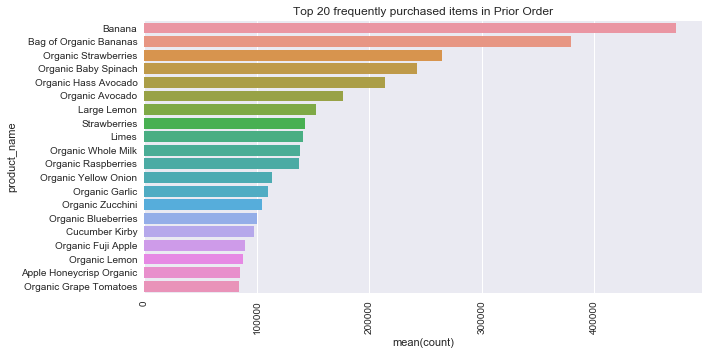

In [6]:
prior_top_item = pd.DataFrame(order_products_prior.product_id.value_counts()).reset_index(level=0)
prior_top_item.columns = ['product_id','count']
prior_top_item = pd.merge(left=products[['product_id','product_name']], right=prior_top_item, how='inner', on='product_id')\
                   .sort_values('count',ascending=False)\
                   .head(20)[['product_name','count']]
plt.figure(figsize=(10,5))
plt.title('Top 20 frequently purchased items in Prior Order')
sns.barplot(x=prior_top_item['count'],y=prior_top_item['product_name'])
plt.xticks(rotation='vertical')
plt.show()

Train order:

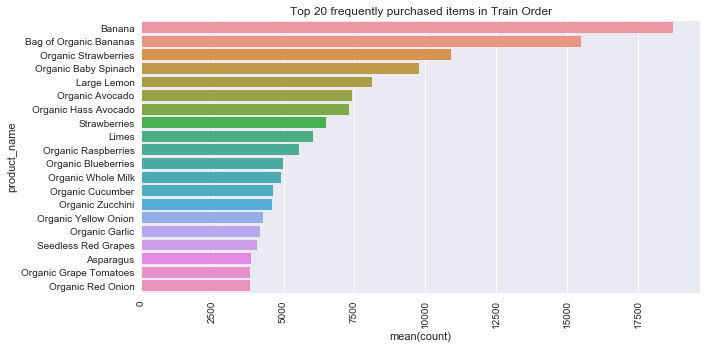

In [7]:
train_top_item = pd.DataFrame(order_products_train.product_id.value_counts()).reset_index(level=0)
train_top_item.columns = ['product_id','count']
train_top_item = pd.merge(left=products[['product_id','product_name']], right=train_top_item, how='inner', on='product_id')\
                   .sort_values('count',ascending=False)\
                   .head(20)[['product_name','count']]
plt.figure(figsize=(10,5))
plt.title("Top 20 frequently purchased items in Train Order")
plt.xticks(rotation='vertical')
sns.barplot(x=train_top_item['count'],y=train_top_item['product_name'])
plt.show()

Reordered Items:

- How many items are in an order ?
    - min: 1
    - max: 145
    - Visualize items <= 50

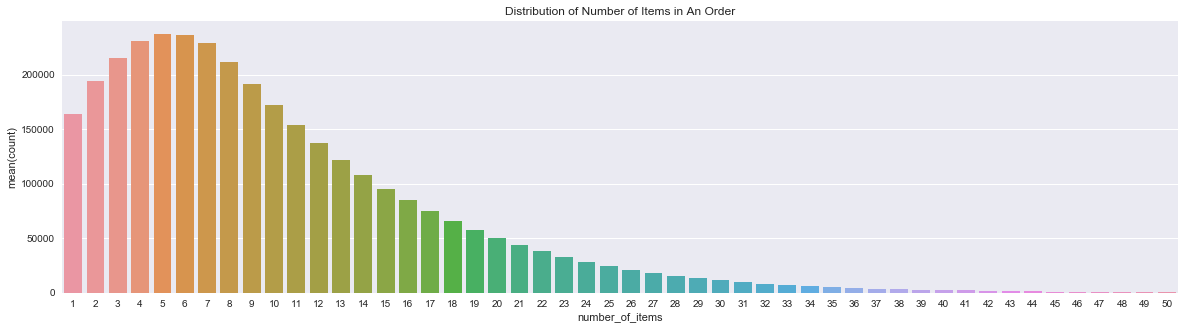

In [8]:
order_products_total = pd.concat([order_products_prior,order_products_train],axis=0)
order_products_total = order_products_total.groupby('order_id').agg('count')
product_count = pd.DataFrame(order_products_total['product_id'].value_counts().sort_index()).reset_index(level=0)
product_count.columns = ['number_of_items','count']
plt.figure(figsize=(20,5))
plt.title("Distribution of Number of Items in An Order")
sns.barplot(x=product_count.query("number_of_items<=50")['number_of_items'],y=product_count.query("number_of_items<=50")['count'])
plt.show()

- On which days of a week are the orders placed?

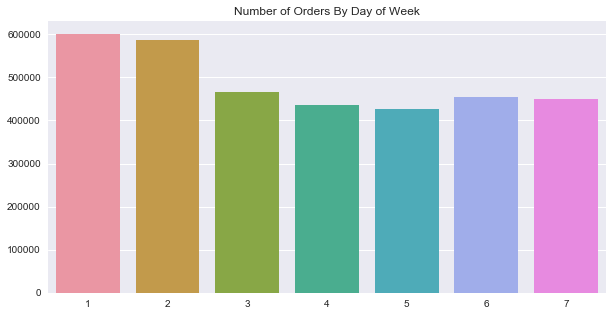

In [9]:
dow = orders['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.title('Number of Orders By Day of Week')
sns.barplot(x=range(1,8,1), y=dow.values)

- On which hours are orders placed?

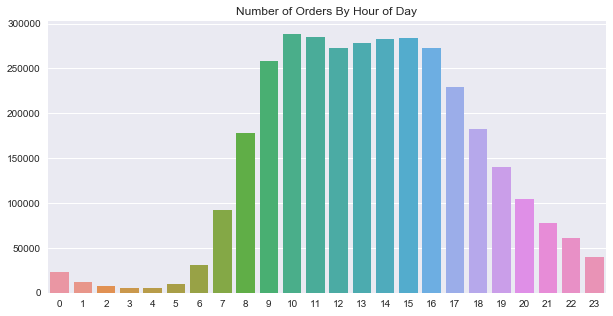

In [10]:
hod = orders['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.title('Number of Orders By Hour of Day')
sns.barplot(x=range(0,24,1), y=hod.values)

- Typycal period between people's two purchases?

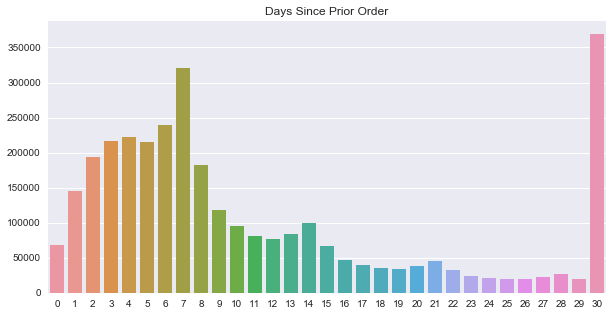

In [11]:
days_since_prior = orders['days_since_prior_order'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.title('Days Since Prior Order')
sns.barplot(x=range(0,31,1), y=days_since_prior.values)